In [44]:
2+2

4

In [91]:
import numpy as np
import pandas as pd
# import itertools

import tempfile
from joblib import load, dump, Parallel, delayed

from scipy.spatial.distance import squareform

from itertools import combinations, chain

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ensembl comparative genomics database: http://uswest.ensembl.org/biomart/martview/

In [93]:
import pandas as pd

other_species = 'Zebrafish'

human_zebrafish = pd.read_csv("/Users/olgabot/Downloads/mart_export (1).txt", sep='\t')
print(human_zebrafish.shape)
# Remove all genes without orthology between zebrafish and human
# human_zebrafish = human_zebrafish.dropna(subset=['Zebrafish gene stable ID'])
print(human_zebrafish.shape)

human_zebrafish.columns = human_zebrafish.columns.str.replace(other_species, 'other').str.strip()
human_zebrafish['other_species'] = other_species
human_zebrafish.head()

(284383, 18)
(284383, 18)


,Gene stable ID,Transcript stable ID,other gene stable ID,other gene name,other protein or transcript stable ID,Query protein or transcript ID,Last common ancestor with other,other chromosome/scaffold name,other chromosome/scaffold start (bp),other chromosome/scaffold end (bp),%id. target other gene identical to query gene,other homology type,%id. query gene identical to target other gene,other Gene-order conservation score,other Whole-genome alignment coverage,dN with other,dS with other,"other orthology confidence [0 low, 1 high]",other_species
0,ENSG00000210049,ENST00000387314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish
1,ENSG00000211459,ENST00000389680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish
2,ENSG00000210077,ENST00000387342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish
3,ENSG00000210082,ENST00000387347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish
4,ENSG00000209082,ENST00000386347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish


In [95]:
other_species = 'Mouse'

human_mouse = pd.read_csv("/Users/olgabot/Downloads/mart_export.txt", sep='\t')
print(human_mouse.shape)
# Remove all genes without orthology between mouse and human
# human_mouse = human_mouse.dropna(subset=['Mouse gene stable ID'])
print(human_mouse.shape)

human_mouse['other_species'] = other_species
human_mouse.columns = human_mouse.columns.str.replace(other_species, 'other').str.strip()
human_mouse.head()

(249084, 15)
(249084, 15)


,Gene stable ID,Transcript stable ID,other gene stable ID,other gene name,other protein or transcript stable ID,other homology type,%id. target other gene identical to query gene,%id. query gene identical to target other gene,other Gene-order conservation score,other Whole-genome alignment coverage,dS with other,dN with other,"other orthology confidence [0 low, 1 high]",Last common ancestor with other,Query protein or transcript ID,other_species
0,ENSG00000210049,ENST00000387314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
1,ENSG00000211459,ENST00000389680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
2,ENSG00000210077,ENST00000387342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
3,ENSG00000210082,ENST00000387347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
4,ENSG00000209082,ENST00000386347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse


In [97]:
human_mouse['other homology type'].value_counts()

ortholog_one2one      131293
ortholog_many2many     17818
ortholog_one2many      16337
Name: other homology type, dtype: int64

In [99]:
cols = ['Gene stable ID', 'Transcript stable ID']

orthologues = pd.concat([human_mouse, human_zebrafish])
orthologues.columns = orthologues.columns.str.lower().str.replace(' ', '_')
print(orthologues.shape)
orthologues.head()

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


(533467, 19)


,%id._query_gene_identical_to_target_other_gene,%id._target_other_gene_identical_to_query_gene,gene_stable_id,last_common_ancestor_with_other,query_protein_or_transcript_id,transcript_stable_id,dn_with_other,ds_with_other,other_gene-order_conservation_score,other_whole-genome_alignment_coverage,other_chromosome/scaffold_end_(bp),other_chromosome/scaffold_name,other_chromosome/scaffold_start_(bp),other_gene_name,other_gene_stable_id,other_homology_type,"other_orthology_confidence_[0_low,_1_high]",other_protein_or_transcript_stable_id,other_species
0,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
1,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
2,NaN,NaN,ENSG00000210077,NaN,NaN,ENST00000387342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
3,NaN,NaN,ENSG00000210082,NaN,NaN,ENST00000387347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse
4,NaN,NaN,ENSG00000209082,NaN,NaN,ENST00000386347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse


In [101]:
sizes = orthologues.fillna("no_orthologue").groupby(['other_species', 'other_homology_type']).size()
sizes

other_species  other_homology_type
Mouse          no_orthologue           83636
               ortholog_many2many      17818
               ortholog_one2many       16337
               ortholog_one2one       131293
Zebrafish      no_orthologue          102817
               ortholog_many2many      38620
               ortholog_one2many       58804
               ortholog_one2one        84142
dtype: int64

In [103]:
sizes.groupby(level=1).sum()

other_homology_type
no_orthologue         186453
ortholog_many2many     56438
ortholog_one2many      75141
ortholog_one2one      215435
dtype: int64

In [105]:
percentages = 100 * sizes.divide(sizes.groupby(level=0).sum())
percentages.name = 'percentage of human genes'
percentages = percentages.reset_index()
percentages

,other_species,other_homology_type,percentage of human genes
0,Mouse,no_orthologue,33.577428
1,Mouse,ortholog_many2many,7.153410
2,Mouse,ortholog_one2many,6.558832
3,Mouse,ortholog_one2one,52.710331
4,Zebrafish,no_orthologue,36.154411
5,Zebrafish,ortholog_many2many,13.580277
6,Zebrafish,ortholog_one2many,20.677748
7,Zebrafish,ortholog_one2one,29.587563


[(0, 100)]

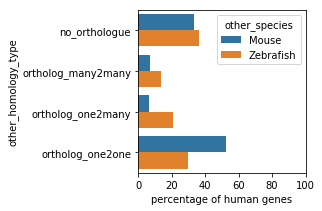

In [107]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(y='other_homology_type', hue='other_species', x='percentage of human genes', data=percentages)
ax.set(xlim=(0, 100))

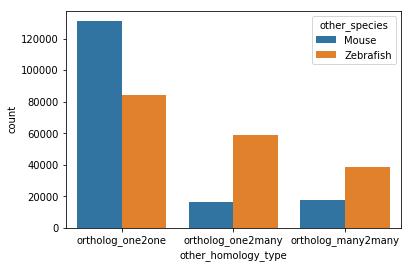

In [109]:


sns.countplot(x='other_homology_type', hue='other_species', data=orthologues)

In [111]:
human_gene_id_to_name = pd.read_csv("/Users/olgabot/Downloads/mart_export (4).txt", sep='\t', index_col='Gene stable ID')
human_gene_id_to_name = human_gene_id_to_name.drop(['Transcript stable ID'], axis=1)
human_gene_id_to_name = human_gene_id_to_name.drop_duplicates()
human_gene_id_to_name = human_gene_id_to_name.sort_index()
human_gene_id_to_name.columns = human_gene_id_to_name.columns.str.lower().str.replace(' ', '_')
# human_gene_id_to_name = human_gene_id_to_name['Gene stable ID']
print(human_gene_id_to_name.shape)
human_gene_id_to_name.head()

(58688, 1)


,gene_name
Gene stable ID,
ENSG00000000003,TSPAN6
ENSG00000000005,TNMD
ENSG00000000419,DPM1
ENSG00000000457,SCYL3
ENSG00000000460,C1orf112


In [113]:
orthologues_gene_names = orthologues.join(human_gene_id_to_name, on='gene_stable_id', how='outer')
print(orthologues_gene_names.shape)
orthologues_gene_names.head()

(533467, 20)


,%id._query_gene_identical_to_target_other_gene,%id._target_other_gene_identical_to_query_gene,gene_stable_id,last_common_ancestor_with_other,query_protein_or_transcript_id,transcript_stable_id,dn_with_other,ds_with_other,other_gene-order_conservation_score,other_whole-genome_alignment_coverage,other_chromosome/scaffold_end_(bp),other_chromosome/scaffold_name,other_chromosome/scaffold_start_(bp),other_gene_name,other_gene_stable_id,other_homology_type,"other_orthology_confidence_[0_low,_1_high]",other_protein_or_transcript_stable_id,other_species,gene_name
0,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-TF
0,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish,MT-TF
1,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-RNR1
1,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish,MT-RNR1
2,NaN,NaN,ENSG00000210077,NaN,NaN,ENST00000387342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-TV


In [115]:
# human_geneid_to_name.loc['XIST']

In [117]:
human_gene_names = [#'XIST', 
     # Constitutively expressed genes
    'ACTB',
    'GAPDH', 
    'RBFOX2', # Tends to be higher in stem cells
    'RPS24',
    
    'SOX4', # Stem cell marker
    'POU5F1', # (OCT4) stem cell marker
    'KLF4', # Stem cell marker
    'MYC', # Stem cell marker
    
    'SOX2', # Neural stem cell
    'PAX3', # Neural stem cell
    'PAX6', # Neural stem cell
    
    
    'NOTCH1',
    
    # Neuronal markers
    'SNAP25', # Neuronal marker
    'RBFOX3', # (NeuN) RNA binding protein specific to neurons
    'VAMP1', # Vesicle associated membrane proteins, part of SNARE vesicle complex
    'SYP', # Synaptic vesicle protein
    

    
    # Melanocyte stem cells
    'SOX9', 
    'WIF1',
    'SFRP1',
    
    # Melanocyte markers
    'MITF',  # Melanocyte induced transcription factor
    'TYR',
     "PMEL",
    'DCT',
    'TYRP1']

# SYN2 = 'ENSG00000157152'
# MITF = "ENSG00000187098"
# GAPDH = 'ENSG00000111640'
# ACTB = 'ENSG00000075624'
# # XIST = 

# human_genes = human_gene_name_to_id[human_gene_names]
# human_genes

In [119]:
# orthologues.query('gene_stable_id in @human_genes')

In [121]:
# dfs = []

# for human_gene_name, human_gene_id in human_genes.items():
#     print(f'--- {human_gene_name} ---')
#     df = orthologues.query('gene_stable_id == @human_gene_id')
#     df = df.drop_duplicates('other_protein_or_transcript_stable_id')
#     print(df.fillna("NA").groupby(['other_species', 'other_homology_type']).size())
#     dfs.append(df)
# orthologues_subset = pd.concat(dfs)
# print(orthologues_subset.shape)
# orthologues_subset.head()

In [123]:
mouse_transcript_protein_ids = pd.read_csv("/Users/olgabot/Downloads/mart_export (2).txt", 
                                           sep='\t')
mouse_transcript_protein_ids.columns = "other_" + \
    mouse_transcript_protein_ids.columns.str.lower().str.replace(" ", "_") 
print(mouse_transcript_protein_ids.shape)
mouse_transcript_protein_ids.head()

(140878, 3)


,other_gene_stable_id,other_transcript_stable_id,other_protein_stable_id
0,ENSMUSG00000064372,ENSMUST00000082423,NaN
1,ENSMUSG00000064371,ENSMUST00000082422,NaN
2,ENSMUSG00000064370,ENSMUST00000082421,ENSMUSP00000081003
3,ENSMUSG00000064369,ENSMUST00000082420,NaN
4,ENSMUSG00000064368,ENSMUST00000082419,ENSMUSP00000081002


In [125]:
protein_ids = orthologues_gene_names.query("gene_name in @human_gene_names").other_protein_or_transcript_stable_id
protein_ids = protein_ids.dropna().drop_duplicates()
protein_ids

6116      ENSDARP00000063799
9677      ENSMUSP00000044938
11373     ENSDARP00000021876
11391     ENSDARP00000056456
13648     ENSMUSP00000006151
15953     ENSDARP00000073055
15960     ENSDARP00000050527
16470     ENSMUSP00000103245
19062     ENSDARP00000097662
16592     ENSMUSP00000017576
19190     ENSDARP00000126058
19203     ENSDARP00000144068
35121     ENSMUSP00000152944
39561     ENSDARP00000091586
58699     ENSMUSP00000087870
66204     ENSDARP00000152284
66288     ENSDARP00000135767
59958     ENSMUSP00000000579
67775     ENSDARP00000006945
70923     ENSMUSP00000004770
78606     ENSDARP00000111575
76734     ENSMUSP00000028727
85194     ENSDARP00000075371
85199     ENSDARP00000019054
112134    ENSMUSP00000096755
125101    ENSDARP00000095266
118724    ENSMUSP00000022971
118733    ENSMUSP00000097885
132287    ENSDARP00000100455
132296    ENSDARP00000010970
119672    ENSMUSP00000069429
133481    ENSDARP00000145061
133489    ENSDARP00000082673
126311    ENSMUSP00000020439
141328    ENSD

In [127]:
# mouse_transcripts = mouse_transcript_protein_ids.loc[protein_ids, 'Transcript stable ID'].dropna()
# mouse_transcripts

In [129]:
zebrafish_transcript_protein_ids = pd.read_csv("/Users/olgabot/Downloads/mart_export (3).txt", 
                                           sep='\t')
zebrafish_transcript_protein_ids.columns = "other_" + \
    zebrafish_transcript_protein_ids.columns.str.lower().str.replace(" ", "_")
print(zebrafish_transcript_protein_ids.shape)
zebrafish_transcript_protein_ids.head()

(65928, 3)


,other_gene_stable_id,other_transcript_stable_id,other_protein_stable_id
0,ENSDARG00000063344,ENSDART00000131829,ENSDARP00000123357
1,ENSDARG00000063344,ENSDART00000144883,ENSDARP00000114467
2,ENSDARG00000097685,ENSDART00000156963,ENSDARP00000128236
3,ENSDARG00000097685,ENSDART00000161066,ENSDARP00000140227
4,ENSDARG00000036008,ENSDART00000137179,ENSDARP00000113342


In [131]:
other_transcript_protein_ids = pd.concat([mouse_transcript_protein_ids, zebrafish_transcript_protein_ids])
print(other_transcript_protein_ids.shape)
other_transcript_protein_ids.head()

(206806, 3)


,other_gene_stable_id,other_transcript_stable_id,other_protein_stable_id
0,ENSMUSG00000064372,ENSMUST00000082423,NaN
1,ENSMUSG00000064371,ENSMUST00000082422,NaN
2,ENSMUSG00000064370,ENSMUST00000082421,ENSMUSP00000081003
3,ENSMUSG00000064369,ENSMUST00000082420,NaN
4,ENSMUSG00000064368,ENSMUST00000082419,ENSMUSP00000081002


In [133]:
left_cols = ['other_protein_or_transcript_stable_id', 'other_gene_stable_id']
right_cols = ['other_protein_stable_id', 'other_gene_stable_id']

orthologues_transcript_ids = orthologues_gene_names.merge(
    other_transcript_protein_ids, left_on=left_cols, right_on=right_cols, how='outer')
print(orthologues_transcript_ids.shape)
orthologues_transcript_ids.head()

(703754, 22)


,%id._query_gene_identical_to_target_other_gene,%id._target_other_gene_identical_to_query_gene,gene_stable_id,last_common_ancestor_with_other,query_protein_or_transcript_id,transcript_stable_id,dn_with_other,ds_with_other,other_gene-order_conservation_score,other_whole-genome_alignment_coverage,...,other_chromosome/scaffold_start_(bp),other_gene_name,other_gene_stable_id,other_homology_type,"other_orthology_confidence_[0_low,_1_high]",other_protein_or_transcript_stable_id,other_species,gene_name,other_transcript_stable_id,other_protein_stable_id
0,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-TF,NaN,NaN
1,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish,MT-TF,NaN,NaN
2,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-RNR1,NaN,NaN
3,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish,MT-RNR1,NaN,NaN
4,NaN,NaN,ENSG00000210077,NaN,NaN,ENST00000387342,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-TV,NaN,NaN


In [135]:
orthologues_subset = orthologues_transcript_ids.query("gene_name in @human_gene_names")
print(orthologues_subset.shape)
orthologues_subset.head()

(743, 22)


,%id._query_gene_identical_to_target_other_gene,%id._target_other_gene_identical_to_query_gene,gene_stable_id,last_common_ancestor_with_other,query_protein_or_transcript_id,transcript_stable_id,dn_with_other,ds_with_other,other_gene-order_conservation_score,other_whole-genome_alignment_coverage,...,other_chromosome/scaffold_start_(bp),other_gene_name,other_gene_stable_id,other_homology_type,"other_orthology_confidence_[0_low,_1_high]",other_protein_or_transcript_stable_id,other_species,gene_name,other_transcript_stable_id,other_protein_stable_id
4325,NaN,NaN,ENSG00000111640,NaN,NaN,ENST00000229239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,GAPDH,NaN,NaN
4326,NaN,NaN,ENSG00000111640,NaN,NaN,ENST00000496049,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,GAPDH,NaN,NaN
4327,NaN,NaN,ENSG00000111640,NaN,NaN,ENST00000396856,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,GAPDH,NaN,NaN
4328,NaN,NaN,ENSG00000111640,NaN,NaN,ENST00000492719,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,GAPDH,NaN,NaN
4329,NaN,NaN,ENSG00000111640,NaN,NaN,ENST00000396861,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,GAPDH,NaN,NaN


In [137]:
# dfs = []

# for human_gene_name, human_gene_id in human_genes.items():
#     print(f'--- {human_gene_name} ---')
#     df = orthologues_transcript_ids.query('gene_stable_id == @human_gene_id')
# #     df = df.drop_duplicates(['other_protein_or_transcript_stable_id'])
#     print(df.fillna("NA").groupby(['other_species', 'other_homology_type']).size())
#     dfs.append(df)
# orthologues_subset = pd.concat(dfs)
# print(orthologues_subset.shape)
# orthologues_subset.head()

In [139]:
# orthologues_transcript_ids.query('gene_stable_id in @human_genes').shape

In [141]:
# orthologues_transcript_ids.query()

In [143]:
orthologues_subset.other_transcript_stable_id

4325                     NaN
4326                     NaN
4327                     NaN
4328                     NaN
4329                     NaN
4330                     NaN
4331                     NaN
4332                     NaN
4333                     NaN
4334                     NaN
4335                     NaN
47998                    NaN
47999                    NaN
48000                    NaN
48001                    NaN
48002                    NaN
48003                    NaN
48004                    NaN
48005                    NaN
48006                    NaN
48007                    NaN
48008                    NaN
48009                    NaN
48010                    NaN
48011                    NaN
48012                    NaN
48013                    NaN
48014                    NaN
48015                    NaN
48016                    NaN
                 ...        
524824    ENSDART00000123568
524825    ENSDART00000123568
524826    ENSDART00000123568
524827    ENSD

In [144]:
# zebrafish_transcripts = zebrafish_transcript_protein_ids.loc[protein_ids, 'transcript_stable_id'].dropna()
# zebrafish_transcripts

In [146]:
transcript_ids = pd.concat([orthologues_subset.other_transcript_stable_id, 
                            orthologues_subset.transcript_stable_id])
transcript_ids = set(transcript_ids.dropna())
print(len(transcript_ids))
# transcript_ids

335


In [148]:
from Bio import SeqIO

import gzip

fastas = {'zebrafish': "/Users/olgabot/Downloads/Danio_rerio.GRCz11.cdna.all.fa",
                'mouse': "/Users/olgabot/Downloads/Mus_musculus.GRCm38.cdna.all.fa",
                'human': "/Users/olgabot/Downloads/Homo_sapiens.GRCh38.cdna.all.fa"}

species_sequences_original = {}

for species, fasta in fastas.items():
    with open(fasta, "r") as handle:
        records = SeqIO.parse(handle, "fasta")
        sequence_subset = [record for record in records if record.id.split('.')[0] in transcript_ids]
        species_sequences_original[species] = sequence_subset

for species, sequences in species_sequences_original.items():
    print(f'{species}: {len(sequences)}')

zebrafish: 32
mouse: 22
human: 281


In [149]:
from Bio import SeqIO

import gzip

fastas = {'zebrafish': "/Users/olgabot/Downloads/Danio_rerio.GRCz11.cdna.all.fa",
                'mouse': "/Users/olgabot/Downloads/Mus_musculus.GRCm38.cdna.all.fa",
                'human': "/Users/olgabot/Downloads/Homo_sapiens.GRCh38.cdna.all.fa"}

species_sequences_all = {}

for species, fasta in fastas.items():
    with open(fasta, "r") as handle:
        records = SeqIO.parse(handle, "fasta")
        species_sequences_all[species] = {record.id.split('.')[0]:record for record in records}


In [150]:
species_sequences_all['human']['ENST00000646664']

SeqRecord(seq=Seq('ACCGCCGAGACCGCGTCCGCCCCGCGAGCACAGAGCCTCGCCTTTGCCGATCCG...TGA', SingleLetterAlphabet()), id='ENST00000646664.1', name='ENST00000646664.1', description='ENST00000646664.1 cdna chromosome:GRCh38:7:5527148:5530601:-1 gene:ENSG00000075624.14 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:ACTB description:actin beta [Source:HGNC Symbol;Acc:HGNC:132]', dbxrefs=[])

In [151]:
for species, sequences in species_sequences_original.items():
    print(f'{species}: {len(sequences)}')
    for sequence in sorted(sequences, key=lambda x: x.id):
        print(sequence.id, len(sequence))

zebrafish: 32
ENSDART00000005143.6 1718
ENSDART00000005676.6 1784
ENSDART00000007584.8 2455
ENSDART00000010248.10 1595
ENSDART00000016382.5 1883
ENSDART00000026992.8 3261
ENSDART00000038828.7 2713
ENSDART00000046268.7 2196
ENSDART00000050528.8 1928
ENSDART00000050855.4 7781
ENSDART00000051491.5 1577
ENSDART00000056457.5 1652
ENSDART00000063800.7 1331
ENSDART00000078594.4 1969
ENSDART00000080143.5 1527
ENSDART00000080927.6 1582
ENSDART00000088240.6 1368
ENSDART00000100813.6 551
ENSDART00000104493.5 2072
ENSDART00000110297.4 1167
ENSDART00000111014.4 1864
ENSDART00000122238.3 1948
ENSDART00000123568.4 2843
ENSDART00000125715.3 1967
ENSDART00000132949.4 1254
ENSDART00000151793.2 597
ENSDART00000164384.2 2797
ENSDART00000168930.2 7474
ENSDART00000175712.2 1589
ENSDART00000185385.1 2943
ENSDART00000187860.1 5219
ENSDART00000192252.1 6020
mouse: 22
ENSMUST00000000579.2 4135
ENSMUST00000004770.6 6042
ENSMUST00000004994.15 3078
ENSMUST00000006151.12 2720
ENSMUST00000017576.10 3150
ENSMUST00000

In [152]:
orthologues_subset.groupby(['other_species', 'other_homology_type']).size()

other_species  other_homology_type
Mouse          ortholog_one2many       18
               ortholog_one2one       243
Zebrafish      ortholog_one2many      343
               ortholog_one2one        65
dtype: int64

In [153]:
orthologues_subset.shape


(743, 22)

In [154]:

def filter_species_transcripts(fastas, transcript_ids):
    species_sequences = {}

    for species, fasta in fastas.items():
        with open(fasta, "r") as handle:
            records = SeqIO.parse(handle, "fasta")
            sequence_subset = [record for record in records if record.id.split('.')[0] in transcript_ids]
            species_sequences[species] = sequence_subset
        print(f'{species}: {len(sequences)}')
    return species_sequences


def get_species_transcripts(human_genes, fastas, orthologues):
    subset = orthologues.query('gene_name in @human_genes')
    print(subset.shape)
    subset = subset.drop_duplicates('other_protein_or_transcript_stable_id')
    print(subset.shape)
    print(subset.groupby(['gene_name', 'other_species', 'other_homology_type']).size())
    print(subset.groupby('other_species').size())

    transcript_ids = pd.concat([subset.other_transcript_stable_id, subset.transcript_stable_id])
    transcript_ids = set(transcript_ids.dropna())
    print(f'len(transcript_ids): {len(transcript_ids)}')

    species_sequences = filter_species_transcripts(fastas, transcript_ids)
    return species_sequences




In [155]:
len(human_gene_names)

24

In [156]:
species_sequences = get_species_transcripts(human_gene_names, fastas, orthologues_transcript_ids)

(743, 22)
(55, 22)
gene_name  other_species  other_homology_type
ACTB       Mouse          ortholog_one2one       1
DCT        Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2one       1
GAPDH      Zebrafish      ortholog_one2one       1
KLF4       Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2one       1
MITF       Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2many      2
MYC        Mouse          ortholog_one2many      2
           Zebrafish      ortholog_one2many      2
NOTCH1     Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2many      2
PAX3       Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2one       1
PAX6       Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2many      2
PMEL       Mouse          ortholog_one2one       1
           Zebrafish      ortholog_one2many      2
RBFOX3     Mouse 

In [157]:
set([x.id for x in species_sequences_original['zebrafish']]) - set([x.id for x in species_sequences['zebrafish']])

set()

In [158]:
import os

folder = os.path.join('..', 'data', '900_hashing_things_out')
os.makedirs(folder, exist_ok=True)


for species, sequences in species_sequences.items():
    with open(os.path.join(folder, f'{species}_transcripts.fasta'), 'w') as f:
        SeqIO.write(sequences, f, 'fasta')

In [159]:
orthologues_transcript_ids.head()

,%id._query_gene_identical_to_target_other_gene,%id._target_other_gene_identical_to_query_gene,gene_stable_id,last_common_ancestor_with_other,query_protein_or_transcript_id,transcript_stable_id,dn_with_other,ds_with_other,other_gene-order_conservation_score,other_whole-genome_alignment_coverage,...,other_chromosome/scaffold_start_(bp),other_gene_name,other_gene_stable_id,other_homology_type,"other_orthology_confidence_[0_low,_1_high]",other_protein_or_transcript_stable_id,other_species,gene_name,other_transcript_stable_id,other_protein_stable_id
0,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-TF,NaN,NaN
1,NaN,NaN,ENSG00000210049,NaN,NaN,ENST00000387314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish,MT-TF,NaN,NaN
2,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-RNR1,NaN,NaN
3,NaN,NaN,ENSG00000211459,NaN,NaN,ENST00000389680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Zebrafish,MT-RNR1,NaN,NaN
4,NaN,NaN,ENSG00000210077,NaN,NaN,ENST00000387342,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mouse,MT-TV,NaN,NaN


In [160]:
orthologues_transcript_ids.to_csv(os.path.join(folder, "orthologues_transcript_ids.csv"), index=False)

In [161]:
ls -lha $folder

total 201024
drwxr-xr-x   6 olgabot  staff   204B Mar  8 07:31 ./
drwxr-xr-x  11 olgabot  staff   374B Mar 13 21:22 ../
-rw-r--r--   1 olgabot  staff    76K Mar 25 18:15 human_transcripts.fasta
-rw-r--r--   1 olgabot  staff    76K Mar 25 18:15 mouse_transcripts.fasta
-rw-r--r--   1 olgabot  staff    98M Mar 25 18:15 orthologues_transcript_ids.csv
-rw-r--r--   1 olgabot  staff    86K Mar 25 18:15 zebrafish_transcripts.fasta


In [162]:
sequence = sequences[0]

In [163]:
ksize = 9

kmers = []

L = len(sequence) - ksize + 1

kmers = set(sequence.seq[i:(i+ksize)] for i in range(L))
len(kmers)

/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:165: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


2434

In [164]:
len(sequence)

2513

In [165]:
import warnings


DNA = "A", "C", "G", "T"

def kmerize(sequence, ksize, verbose=False, alphabet=DNA):
    L = len(sequence) - ksize + 1

    with warnings.catch_warnings():
        # Ignores this warning from BioPython:
        # BiopythonWarning: Biopython Seq objects now use string comparison. 
        # Older versions of Biopython used object comparison. During this 
        # transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if 
        # you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] 
        # for the new string hashing behaviour.
        warnings.simplefilter("ignore")
        try:
            # "sequence" is a SeqRecord
            kmers = set(sequence.seq[i:(i+ksize)] for i in range(L) if all(x in alphabet for x in sequence.seq[i:(i+ksize)]))
        except AttributeError:
            # "sequence" is a Seq or string
            kmers = set(sequence[i:(i+ksize)] for i in range(L) if all(x in alphabet for x in sequence[i:(i+ksize)]))
    
    if verbose:
        n_possible = 4**ksize
        n_observed = len(kmers)
        percentage_observed = 100*n_observed/n_possible
        print(f"{n_observed}/(4^{ksize} = {n_possible:,}) total length={ksize} k-mers observed "
              f"({percentage_observed:.2f}%))\n\tTotal possible for this sequence: {L}")
    return kmers

kmers = kmerize(sequence, 9, verbose=True)

2434/(4^9 = 262,144) total length=9 k-mers observed (0.93%))
	Total possible for this sequence: 2505


In [166]:
# kmers

In [167]:
n_hashes = 50

In [168]:


# len(set(hashes))

In [169]:
kmer = kmers.pop()
kmer

Seq('AGCGACGAA', SingleLetterAlphabet())

In [170]:
def three_frame_translation(kmer):
    # Create three-frame k-mers
    kmers = [kmer[i:] for i in range(3)]
    
    # Get kmer frame lengths
    lengths = [len(k) for k in kmers]
    
    # How many Ns to add if the codon isn't divisible by 3
    padding = ["" if l % 3 == 0 else (3-(l % 3)) * "N" for l in lengths]
    
    # Add Ns to end of three-frame kmer if it is not a multiple of three (for codons)
    padded_kmers = [k + pad for (k, pad) in zip(kmers, padding)]
    
    # Perform 3-frame translation
    translations = [k.translate() for k in padded_kmers]
#     import pdb; pdb.set_trace()
    # Remove translations with stop codons
    translations = [t for t in translations if '*' not in t]
    return translations


def six_frame_translation(kmer):
    strand1_translations = three_frame_translation(kmer)
    reverse_complement_translations = three_frame_translation(kmer.reverse_complement())
    return strand1_translations + reverse_complement_translations

three_frame_translation(kmer)

[Seq('SDE', ExtendedIUPACProtein()),
 Seq('ATX', ExtendedIUPACProtein()),
 Seq('RRX', ExtendedIUPACProtein())]

### Example for presentation

In [171]:
from Bio.Seq import Seq

In [172]:
sequence

SeqRecord(seq=Seq('GGATGGTTGTCTATTAACTTGTTCAAAAAAGTATCAGGAGTTGTCAAGGCAGAG...AAA', SingleLetterAlphabet()), id='ENST00000325404.2', name='ENST00000325404.2', description='ENST00000325404.2 cdna chromosome:GRCh38:3:181711924:181714436:1 gene:ENSG00000181449.3 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:SOX2 description:SRY-box 2 [Source:HGNC Symbol;Acc:HGNC:11195]', dbxrefs=[])

In [173]:
seq = Seq('AATGCCTGTGAGACTAATAGCAACTC', alphabet=sequence.seq.alphabet)

ksize = 9

kmers = [seq[i:i+ksize] for i in range(len(seq)-ksize+1)]
kmers

[Seq('AATGCCTGT', SingleLetterAlphabet()),
 Seq('ATGCCTGTG', SingleLetterAlphabet()),
 Seq('TGCCTGTGA', SingleLetterAlphabet()),
 Seq('GCCTGTGAG', SingleLetterAlphabet()),
 Seq('CCTGTGAGA', SingleLetterAlphabet()),
 Seq('CTGTGAGAC', SingleLetterAlphabet()),
 Seq('TGTGAGACT', SingleLetterAlphabet()),
 Seq('GTGAGACTA', SingleLetterAlphabet()),
 Seq('TGAGACTAA', SingleLetterAlphabet()),
 Seq('GAGACTAAT', SingleLetterAlphabet()),
 Seq('AGACTAATA', SingleLetterAlphabet()),
 Seq('GACTAATAG', SingleLetterAlphabet()),
 Seq('ACTAATAGC', SingleLetterAlphabet()),
 Seq('CTAATAGCA', SingleLetterAlphabet()),
 Seq('TAATAGCAA', SingleLetterAlphabet()),
 Seq('AATAGCAAC', SingleLetterAlphabet()),
 Seq('ATAGCAACT', SingleLetterAlphabet()),
 Seq('TAGCAACTC', SingleLetterAlphabet())]

In [185]:
kmer = kmers[7]
print(kmer)
[(kmer[i:] + "NN").translate() for i in range(3)]

GTGAGACTA


/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2609: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


[Seq('VRL', ExtendedIUPACProtein()),
 Seq('*DX', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('ETX', ExtendedIUPACProtein())]

In [188]:
kmer.complement()

Seq('CACTCTGAT', SingleLetterAlphabet())

In [187]:
rc = kmer.complement()[::-1]
print(rc)

[(rc[i:]+ "NN").translate() for i in range(3)]

TAGTCTCAC


/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2609: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


[Seq('*SH', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('SLT', ExtendedIUPACProtein()),
 Seq('VSX', ExtendedIUPACProtein())]

In [176]:
translations = [six_frame_translation(kmer) for kmer in kmers]
translations

[[Seq('NAC', ExtendedIUPACProtein()),
  Seq('MPV', ExtendedIUPACProtein()),
  Seq('CLX', ExtendedIUPACProtein()),
  Seq('TGI', ExtendedIUPACProtein()),
  Seq('QAX', ExtendedIUPACProtein()),
  Seq('RHX', ExtendedIUPACProtein())],
 [Seq('MPV', ExtendedIUPACProtein()),
  Seq('CLX', ExtendedIUPACProtein()),
  Seq('ACX', ExtendedIUPACProtein()),
  Seq('HRH', ExtendedIUPACProtein()),
  Seq('TGX', ExtendedIUPACProtein()),
  Seq('QAX', ExtendedIUPACProtein())],
 [Seq('ACX', ExtendedIUPACProtein()),
  Seq('PVX', ExtendedIUPACProtein()),
  Seq('SQA', ExtendedIUPACProtein()),
  Seq('HRX', ExtendedIUPACProtein()),
  Seq('TGX', ExtendedIUPACProtein())],
 [Seq('ACE', ExtendedIUPACProtein()),
  Seq('PVX', ExtendedIUPACProtein()),
  Seq('LTG', ExtendedIUPACProtein()),
  Seq('SQA', ExtendedIUPACProtein()),
  Seq('HRX', ExtendedIUPACProtein())],
 [Seq('PVR', ExtendedIUPACProtein()),
  Seq('CEX', ExtendedIUPACProtein()),
  Seq('SHR', ExtendedIUPACProtein()),
  Seq('LTG', ExtendedIUPACProtein()),
  Seq('S

In [177]:
list(map(len, translations))

[6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]

In [178]:
six_frame_translation(kmer)

[Seq('NAC', ExtendedIUPACProtein()),
 Seq('MPV', ExtendedIUPACProtein()),
 Seq('CLX', ExtendedIUPACProtein()),
 Seq('TGI', ExtendedIUPACProtein()),
 Seq('QAX', ExtendedIUPACProtein()),
 Seq('RHX', ExtendedIUPACProtein())]

In [58]:
kmer

Seq('CGGAGCCCT', SingleLetterAlphabet())

In [59]:
kmer.translate()

Seq('RSP', ExtendedIUPACProtein())

In [60]:
(kmer[1:]+"N").translate()

Seq('GAL', ExtendedIUPACProtein())

In [61]:
(kmer[2:]+"N").translate()

/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2609: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Seq('EP', ExtendedIUPACProtein())

In [62]:
kmer2 = kmer[:5]

In [63]:
three_frame_translation(kmer2)

[Seq('RX', ExtendedIUPACProtein()),
 Seq('GX', ExtendedIUPACProtein()),
 Seq('E', ExtendedIUPACProtein())]

In [64]:
len(kmer) % 3

0

In [65]:
kmer.translate()

Seq('RSP', ExtendedIUPACProtein())

In [66]:
(kmer[1:] + "N").translate()

Seq('GAL', ExtendedIUPACProtein())

In [67]:
x = (kmer[2:]+"NN").translate()
x

Seq('EPX', ExtendedIUPACProtein())

In [68]:
x.alphabet

ExtendedIUPACProtein()

In [69]:
'*' in x

False

In [70]:
# record.name

In [71]:
# kmers

In [72]:
sequences

[SeqRecord(seq=Seq('GGATGGTTGTCTATTAACTTGTTCAAAAAAGTATCAGGAGTTGTCAAGGCAGAG...AAA', SingleLetterAlphabet()), id='ENST00000325404.2', name='ENST00000325404.2', description='ENST00000325404.2 cdna chromosome:GRCh38:3:181711924:181714436:1 gene:ENSG00000181449.3 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:SOX2 description:SRY-box 2 [Source:HGNC Symbol;Acc:HGNC:11195]', dbxrefs=[]),
 SeqRecord(seq=Seq('GGAAGAACACAATGGATCTGGTGCTAAAAAGATGCCTTCTTCATTTGGCTGTGA...TGA', SingleLetterAlphabet()), id='ENST00000449260.6', name='ENST00000449260.6', description='ENST00000449260.6 cdna chromosome:GRCh38:12:55954105:55966022:-1 gene:ENSG00000185664.14 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:PMEL description:premelanosome protein [Source:HGNC Symbol;Acc:HGNC:10880]', dbxrefs=[]),
 SeqRecord(seq=Seq('GCGGGGTAGTCGGCGCGAGGCGGAGCTTGGCAGTTCCGTCCACTTCAGCCGCAG...AAA', SingleLetterAlphabet()), id='ENST00000400911.7', name='ENST00000400911.7', descrip

In [73]:
kmers = chain(*[kmerize(seq, ksize) for seq in sequences])
hashes = [hash(str(kmer)) for kmer in kmers]

In [74]:
hashes[:10]

[-4810975060640194558,
 -9118665196946685946,
 667498883141402642,
 7272617414452781077,
 5381556305252499478,
 1571189243337572375,
 2393891838238146581,
 -3859294402449743845,
 -5435170652807192544,
 -7588229982562181086]

In [75]:
# sorted_hashes_kmers = sorted(zip(hashes, kmers))
# sorted_hashes_kmers

In [76]:
# k, h = zip(*sorted_hashes_kmers)
# k[:10]

In [77]:
# h[:10]

In [78]:
hash('CTTCCTTCC')

2768778235414158326

In [79]:
species_sequences

{'zebrafish': [SeqRecord(seq=Seq('ATTGCTCTAGTAAACAATCAAACTCCGACTGCAAGGTTAAATAAGGTATCTGGT...TAA', SingleLetterAlphabet()), id='ENSDART00000175712.2', name='ENSDART00000175712.2', description='ENSDART00000175712.2 cdna chromosome:GRCz11:12:32729470:33245236:1 gene:ENSDARG00000010083.12 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:rbfox3a description:RNA binding fox-1 homolog 3a [Source:ZFIN;Acc:ZDB-GENE-111213-1]', dbxrefs=[]),
  SeqRecord(seq=Seq('ACTCTCGCGACGCGCACCGAAAAGCAGCGCGCGCCCAACACTCTTATCAAAACT...ATA', SingleLetterAlphabet()), id='ENSDART00000080143.5', name='ENSDART00000080143.5', description='ENSDART00000080143.5 cdna chromosome:GRCz11:10:20351413:20357013:-1 gene:ENSDARG00000057678.5 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:sfrp1b description:secreted frizzled-related protein 1b [Source:ZFIN;Acc:ZDB-GENE-061103-1]', dbxrefs=[]),
  SeqRecord(seq=Seq('TCAGACTATCAGTCTGTCCAGCATCTGAGAGCTGCACGAGCGCGCAGGGTTGTT...GAA', Sing

In [80]:
from Bio import Seq

In [81]:
def set_sequences(sequences):
    """Creates a set of sequences while ignoring BioPython warnings"""
    with warnings.catch_warnings():
        # Ignores this warning from BioPython:
        # BiopythonWarning: Biopython Seq objects now use string comparison. 
        # Older versions of Biopython used object comparison. During this 
        # transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if 
        # you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] 
        # for the new string hashing behaviour.
        warnings.simplefilter("ignore")
        seqs = set(str(s) for s in sequences)
        return seqs


def trypsinize(kmers):
    """Create 'trypsin-cleaved peptides', i.e. ones ending in K or R"""
    return [x for x in kmers if x.endswith("K") or x.endswith("R")]
    
    
def kmerize_sequences(sequences, ksize, molecule, trypsinize=False, verbose=False):
    """
    
    trypsinize : bool
        If True, only use protein k-mers that could have been cleaved by
        Trypsin, i.e. ending with an R or a K amino acid
    
    """
    kmers = chain(*[kmerize(seq, ksize, verbose=verbose) for seq in sequences])
    
    if molecule.lower() == 'dna' or molecule.lower() == 'rna':
        # Dummy if statement to check that 'dna' or RNA was specified
        pass
    elif molecule == 'protein':
        # Given unstranded RNA-seq data would do 6-frame translation but 
        # since we are giving exactly the transcript sequences, can do 3-frame translation
        kmers = set_sequences(chain(*[three_frame_translation(kmer) for kmer in kmers]))
        
        if trypsinize:
            kmers = trypsinize(kmers)
    else:
        raise ValueError(f"Molecule '{molecule}' is not supported!" 
                         "Please specify either 'dna' or 'protein'")
    return kmers


def minhash(sequences, ksize, n_hashes, return_exact_kmers=False, molecule='dna'):
    
    kmers = kmerize_sequences(sequences, ksize, molecule)
    
    hashes_kmers = ((hash(str(kmer)), kmer) for kmer in kmers)

    # Combine hashes and kmers into a single list
    sorted_hashes_kmers = sorted(list(set_sequences(hashes_kmers)))
    
    # If n_hashes is 0 or less, return all of them
    if n_hashes <= 0:
        n_hashes = len(sorted_hashes_kmers)
    
    # Extract first list and second list for hashes and kmers
    sorted_hashes, sorted_kmers = list(zip(*sorted_hashes_kmers))[:n_hashes]

    minhashes = set(sorted_hashes)
    
    if return_exact_kmers:
        return minhashes, set_sequences(sorted_kmers)
    else:
        return minhashes


def hyperloglog(sequences):
    pass

ksize = 9
n_hashes = 500

# protein_minhash_kmers = {}
# rna_minhash_kmers = {}

# protein_true_kmers = {}
# rna_true_kmers = {}

# for species, sequences in species_sequences.items():
#     protein_minhash_kmers[species] = minhash(sequences, ksize=ksize, n_hashes=n_hashes, 
#                                  return_kmers=True, molecule='protein')
#     rna_minhash_kmers[species] = minhash(sequences, ksize=ksize, n_hashes=n_hashes, 
#                                  return_kmers=True, molecule='dna')
    
#     protein_true_kmers[species] = minhash(sequences, ksize=ksize, n_hashes=0, 
#                                  return_kmers=True, molecule='protein')
#     rna_true_kmers[species] = minhash(sequences, ksize=ksize, n_hashes=0, 
#                                  return_kmers=True, molecule='dna')
    
    
def compare_species_minhashes(minhashes, exact_kmers=None, verbose=False):
    iterable = combinations(minhashes.items(), 2)
    
    exact_df = pd.DataFrame(index=minhashes.keys(), columns=minhashes.keys())
    estimated_df = pd.DataFrame(index=minhashes.keys(), columns=minhashes.keys())

    for (species1, kmers1), (species2, kmers2) in iterable:
        if verbose:
            print(f"\t--- {species1} : {species2} ---")
            print("\tBasic jaccard:", basic_jaccard(kmers1, kmers2))
        if exact_kmers is not None:
            exact = basic_jaccard(exact_kmers[species1], exact_kmers[species2])
            exact_df.loc[species1, species2] = exact
            exact_df.loc[species2, species1] = exact
            if verbose:
                print("\t\tExact jaccard:", exact)
        try:
            estimated = estimated_jaccard(kmers1, kmers2)
            estimated_df.loc[species1, species2] = estimated
            estimated_df.loc[species2, species1] = estimated
            difference = estimated-exact
            if verbose:
                print("\tEstimated jaccard:", estimated)
                print(f'\t\tDifference:', difference)
#             jaccard_differences.loc[species1, species2] = difference
#             jaccard_differences.loc[species2, species1] = difference
        except AssertionError:
            continue
    return estimated_df, exact_df
        
    
def compare_species_sequences(species_sequences, n_hashes=500, ksize=9):
    protein_kmers = dict(exact={}, minhash={})
    rna_kmers = dict(exact={}, minhash={})
    
    molecule_kmers = dict(protein=protein_kmers, rna=rna_kmers)
    for molecule, kmers in molecule_kmers.items():
        print(f'molecule: {molecule}')
        for species, sequences in species_sequences.items():
            print(f'\t\tspecies: {species}')
            minhashes, exact_kmers = minhash(sequences, ksize=ksize, n_hashes=n_hashes, 
                             return_exact_kmers=True, molecule=molecule)
            print(f'\t\t\tlen(minhashes): {len(minhashes)}')
            print(f'\t\t\tlen(exact_kmers): {len(exact_kmers)}')
            kmers['minhash'][species] = minhashes
            kmers['exact'][species] = exact_kmers
        print(f'--- molecule: {molecule} ---')
        estimated, exact = compare_species_minhashes(kmers['minhash'], kmers['exact'])
        diff = estimated - exact
        print('- Estimated -')
        print(estimated)
        print('- Exact -')
        print(exact)
        print('- Diff -')
        print(diff)
    return molecule_kmers

In [82]:
# mitf_syn2_kmers = compare_species_sequences(mitf_syn2)

In [83]:
# %debug

In [84]:
# mitf_syn2_kmers

In [85]:
def estimated_jaccard(set1, set2):
    # Can only compare lists with identical length
    assert len(set1) == len(set2)
    L = len(set1)
    
    union = set1.union(set2)
    estimated_union = set(sorted(list(union))[:L])
    
    
    intersection = set1.intersection(set2).intersection(estimated_union)
    return len(intersection)/len(estimated_union)

In [86]:
def basic_jaccard(set1, set2):
    union = set1.union(set2)
    intersection = set1.intersection(set2)
    return len(intersection)/len(union)

In [87]:
# compare_speci

In [88]:
# compare_species_minhashes(rna_minhash_kmers, rna_true_kmers)

In [89]:
# compare_species_minhashes(protein_minhash_kmers, protein_true_kmers)

In [90]:
# compare_species_minhashes(rna_minhash_kmers)

In [91]:
# rna_true_kmers.keys()

In [92]:
# compare_species(rna_true_kmers)

In [110]:
%debug

> <ipython-input-104-fc794b0a2c47>(1)<module>()
----> 1 compare_species_minhashes(rna_minhash_kmers, rna_true_kmers)

ipdb> q


In [93]:

# iterable = combinations(rna_minhash_kmers.items(), 2)

# for (species1, kmers1), (species2, kmers2) in iterable:
#     print("Basic jaccard")
#     print(species1, species2, basic_jaccard(kmers1, kmers2))

In [94]:
# from itertools import combinations

# iterable = combinations(protein_minhashes.items(), 2)

# for (species1, kmers1), (species2, kmers2) in iterable:

#     print(species1, species2, jaccard(kmers1, kmers2))

In [95]:
sequence.seq.find("ATG")

2

In [96]:
str(sequence[sequence.seq.find("ATG"):].translate(to_stop=True).seq)

'MVVY'

In [97]:
# protein_kmers = protein_true_kmers['zebrafish']
# len(protein_kmers)

In [98]:
# len(trypsinize(protein_kmers))

In [99]:
len(hashes)

68029

In [100]:
len(hashes[:0])

0

## Do hyperloglog

In [101]:
kmer

Seq('CGGAGCCCT', SingleLetterAlphabet())

In [102]:
from hashlib import sha1
import math
import sys

if sys.version_info[0] >= 3:
    long = int
    xrange = range
    unicode = str
    
def bit_length(w):
    return w.bit_length()


def bit_length_emu(w):
    return len(bin(w)) - 2 if w > 0 else 0


# Workaround for python < 2.7
if not hasattr(int, 'bit_length'):
    bit_length = bit_length_emu




In [103]:
error_rate = 0.2

In [104]:
def get_alpha(p):
    if not (4 <= p <= 16):
        raise ValueError("p=%d should be in range [4 : 16]" % p)

    if p == 4:
        return 0.673

    if p == 5:
        return 0.697

    if p == 6:
        return 0.709

    return 0.7213 / (1.0 + 1.079 / (1 << p))


def get_rho(w, max_width):
    rho = max_width - bit_length(w) + 1

    if rho <= 0:
        raise ValueError('w overflow')

    return rho


In [105]:
p = int(math.ceil(math.log((1.04 / error_rate) ** 2, 2)))

alpha = get_alpha(p)
p = p
m = 1 << p
M = [ 0 for i in range(m) ]

In [106]:
m

32

In [107]:
sketchsize = 10

In [108]:
sketch = [0 for i in range(sketchsize)]
sketch

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [109]:
# max(M[j], get_rho(w, 64 - p))

In [110]:
value = str(kmer)

bytestring = bytes(value.encode('utf8') if isinstance(value, unicode) else value)
bytestring

b'CGGAGCCCT'

In [111]:
x = long(sha1(bytes(value.encode('utf8') if isinstance(value, unicode) else value)).hexdigest()[:16], 16)
x

6688311428831023756

In [112]:
p

5

In [113]:
j = x & (m - 1)
w = x >> p

M[j] = max(M[j], get_rho(w, 64 - p))

## Generate single cells expressing random reads from these transcripts

Use these values as the mean for the poisson distribution to create simulated reads 

In [114]:
human_gene_names = [#'XIST', 
     # Constitutively expressed genes
    'ACTB',
    'GAPDH', 
    'RBFOX2', # Tends to be higher in stem cells
    'RPS24',
    
    # Stem cell markers
    'SOX4', # Stem cell marker
    'POU5F1', # (OCT4) stem cell marker
    'KLF4', # Stem cell marker
    'MYC', # Stem cell marker
    
    # Neural stem cell markers
    'SOX2', # Neural stem cell
    'PAX3', # Neural stem cell
    'PAX6', # Neural stem cell
    
    # because this gene is involved in basically all 
    # developmental processes and cell-cell communication
    'NOTCH1',
    
    # Neuronal markers
    'SNAP25', # Neuronal marker
    'RBFOX3', # (NeuN) RNA binding protein specific to neurons
    'VAMP1', # Vesicle associated membrane proteins, part of SNARE vesicle complex
    'SYP', # Synaptic vesicle protein
    

    
    # Melanocyte stem cells
    'SOX9', 
    'WIF1',
    'SFRP1',
    
    # Melanocyte markers
    'MITF',  # Melanocyte induced transcription factor
    'TYR',
     "PMEL",
    'DCT',
    'TYRP1']

In [115]:
constitutively_expressed_genes = [
    'ACTB',  # Actin
    'GAPDH', 
    'RBFOX2', # Tends to be higher in stem cells
    'RPS24',
]

stem_cell_markers = [
    'SOX4', # Stem cell marker
    'POU5F1', # (OCT4) stem cell marker
    'KLF4', # Stem cell marker
    'MYC', # Stem cell marker
]

neural_stem_cell_markers = [
    'SOX2', # Neural stem cell
    'PAX3', # Neural stem cell
    'PAX6', # Neural stem cell
]
neuronal_markers = [    'SNAP25', # Neuronal marker
    'RBFOX3', # (NeuN) RNA binding protein specific to neurons
    'VAMP1', # Vesicle associated membrane proteins, part of SNARE vesicle complex
    'SYP', # Synaptic vesicle protein
                   ]

notch = ['NOTCH1']

melanocyte_stem_cell_markers = ['SOX9', 
                                'WIF1',
                                'SFRP1'
                               ]
melanocyte_markers = ['MITF',  # Melanocyte induced transcription factor
    'TYR',
     "PMEL",
    'DCT',
    'TYRP1']

In [117]:
gene_poisson_means = pd.DataFrame(0,
    index=human_gene_names, columns=['stem_cells', 'neural_stem_cells', 
                                     'neurons', 'melanocyte_stem_cells', 'melanocytes'])
gene_poisson_means.loc[constitutively_expressed_genes, :] = 100
gene_poisson_means.loc[stem_cell_markers, 'stem_cells'] = 100
gene_poisson_means.loc[neural_stem_cell_markers, 'neural_stem_cells'] = 100
gene_poisson_means.loc[neuronal_markers, 'neurons'] = 100

gene_poisson_means.loc[melanocyte_stem_cell_markers, 'melanocyte_stem_cells'] = 100
gene_poisson_means.loc[melanocyte_markers, 'melanocytes'] = 100

gene_poisson_means.loc[stem_cell_markers, ['neural_stem_cells', 'melanocyte_stem_cells']] = 50
gene_poisson_means

,stem_cells,neural_stem_cells,neurons,melanocyte_stem_cells,melanocytes
ACTB,100,100,100,100,100
GAPDH,100,100,100,100,100
RBFOX2,100,100,100,100,100
RPS24,100,100,100,100,100
SOX4,100,50,0,50,0
POU5F1,100,50,0,50,0
KLF4,100,50,0,50,0
MYC,100,50,0,50,0
SOX2,0,100,0,0,0
PAX3,0,100,0,0,0


In [118]:
# n_cells_per_group = 100

# n_celltypes = len(gene_poisson_means.columns)

# n_cells = n_cells_per_group * n_celltypes
# n_genes = len(gene_poisson_means.index)


# gene_counts = pd.DataFrame(np.zeros((n_cells, n_genes)))
# print(gene_counts.shape)

# for i, (celltype, gene_means) in enumerate(gene_poisson_means.items()):
#     celltype_start = i*n_cells_per_group
#     celltype_end = celltype_start + n_cells_per_group
#     for j, gene_mean in enumerate(gene_means):
#         gene_counts.loc[celltype_start:celltype_end, j] = np.random.poisson(gene_means, size=n_cells_per_group)
# gene_counts

In [119]:
# (n_genes, n_celltypes, n_cells_per_group)

In [122]:
gene_poisson_means.shape

(24, 5)

In [123]:
np.random.seed(0)
n_cells_per_group = 100

data = np.concatenate([np.random.poisson(gene_poisson_means.T) for _ in range(n_cells_per_group)])


data.shape


(500, 24)

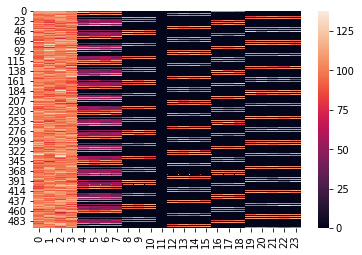

In [124]:
sns.heatmap(data)

In [125]:
cell_names = [f"{x}_{i:02d}" for i in range(n_cells_per_group) for x in gene_poisson_means.columns]
cell_names[:20]

['stem_cells_00',
 'neural_stem_cells_00',
 'neurons_00',
 'melanocyte_stem_cells_00',
 'melanocytes_00',
 'stem_cells_01',
 'neural_stem_cells_01',
 'neurons_01',
 'melanocyte_stem_cells_01',
 'melanocytes_01',
 'stem_cells_02',
 'neural_stem_cells_02',
 'neurons_02',
 'melanocyte_stem_cells_02',
 'melanocytes_02',
 'stem_cells_03',
 'neural_stem_cells_03',
 'neurons_03',
 'melanocyte_stem_cells_03',
 'melanocytes_03']

In [126]:
gene_counts = pd.DataFrame(data, index=cell_names, columns=gene_poisson_means.index)
gene_counts = gene_counts.sort_index()
gene_counts

,ACTB,GAPDH,RBFOX2,RPS24,SOX4,POU5F1,KLF4,MYC,SOX2,PAX3,...,VAMP1,SYP,SOX9,WIF1,SFRP1,MITF,TYR,PMEL,DCT,TYRP1
melanocyte_stem_cells_00,110,111,107,93,46,46,36,51,0,0,...,0,0,101,102,94,0,0,0,0,0
melanocyte_stem_cells_01,89,102,119,101,55,48,55,44,0,0,...,0,0,79,94,96,0,0,0,0,0
melanocyte_stem_cells_02,96,111,100,85,61,46,48,41,0,0,...,0,0,107,108,83,0,0,0,0,0
melanocyte_stem_cells_03,80,92,96,97,59,46,52,37,0,0,...,0,0,91,87,86,0,0,0,0,0
melanocyte_stem_cells_04,92,85,107,104,43,54,51,51,0,0,...,0,0,84,104,91,0,0,0,0,0
melanocyte_stem_cells_05,95,80,98,86,52,47,54,59,0,0,...,0,0,100,92,112,0,0,0,0,0
melanocyte_stem_cells_06,93,86,103,114,46,63,45,47,0,0,...,0,0,92,112,98,0,0,0,0,0
melanocyte_stem_cells_07,89,87,93,88,59,61,51,46,0,0,...,0,0,98,117,107,0,0,0,0,0
melanocyte_stem_cells_08,91,86,95,99,37,55,64,51,0,0,...,0,0,94,117,107,0,0,0,0,0
melanocyte_stem_cells_09,112,116,96,85,52,46,45,50,0,0,...,0,0,99,90,96,0,0,0,0,0


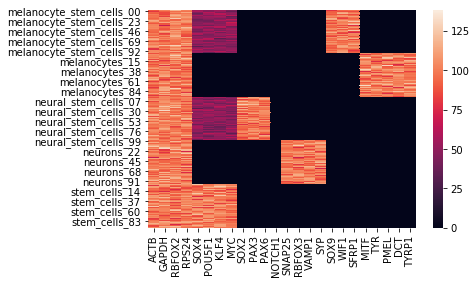

In [127]:
sns.heatmap(gene_counts)

In [128]:
gene_counts.head()

,ACTB,GAPDH,RBFOX2,RPS24,SOX4,POU5F1,KLF4,MYC,SOX2,PAX3,...,VAMP1,SYP,SOX9,WIF1,SFRP1,MITF,TYR,PMEL,DCT,TYRP1
melanocyte_stem_cells_00,110,111,107,93,46,46,36,51,0,0,...,0,0,101,102,94,0,0,0,0,0
melanocyte_stem_cells_01,89,102,119,101,55,48,55,44,0,0,...,0,0,79,94,96,0,0,0,0,0
melanocyte_stem_cells_02,96,111,100,85,61,46,48,41,0,0,...,0,0,107,108,83,0,0,0,0,0
melanocyte_stem_cells_03,80,92,96,97,59,46,52,37,0,0,...,0,0,91,87,86,0,0,0,0,0
melanocyte_stem_cells_04,92,85,107,104,43,54,51,51,0,0,...,0,0,84,104,91,0,0,0,0,0


In [129]:
cell = gene_counts.iloc[0]
cell.head()

ACTB      110
GAPDH     111
RBFOX2    107
RPS24      93
SOX4       46
Name: melanocyte_stem_cells_00, dtype: int64

In [130]:
import re

In [131]:
human_transcript_id_to_seq = dict(zip([x.id.split('.')[0] for x in species_sequences_original['human']], species_sequences_original['human']))
human_transcript_id_to_seq.keys()

dict_keys(['ENST00000325404', 'ENST00000463773', 'ENST00000412166', 'ENST00000434616', 'ENST00000489610', 'ENST00000449260', 'ENST00000552882', 'ENST00000550464', 'ENST00000548747', 'ENST00000548493', 'ENST00000550447', 'ENST00000549564', 'ENST00000549404', 'ENST00000550762', 'ENST00000548803', 'ENST00000547137', 'ENST00000546543', 'ENST00000556802', 'ENST00000548689', 'ENST00000550590', 'ENST00000549430', 'ENST00000549418', 'ENST00000549233', 'ENST00000549413', 'ENST00000400911', 'ENST00000361716', 'ENST00000544432', 'ENST00000535180', 'ENST00000396308', 'ENST00000538970', 'ENST00000535927', 'ENST00000539047', 'ENST00000377028', 'ENST00000483392', 'ENST00000490854', 'ENST00000472871', 'ENST00000446125', 'ENST00000244745', 'ENST00000331789', 'ENST00000646664', 'ENST00000464611', 'ENST00000425660', 'ENST00000462494', 'ENST00000493945', 'ENST00000473257', 'ENST00000645576', 'ENST00000647275', 'ENST00000477812', 'ENST00000642480', 'ENST00000432588', 'ENST00000484841', 'ENST00000645025', '

In [132]:
len(human_transcript_id_to_seq)

281

In [133]:
# orthologues_transcript_ids.query('gene_name == "RBFOX3"')

In [134]:
import random
random.seed(0)


read_length = 100

cell_sequences = ''

for gene, count in cell.items():
    print(gene)

    transcript_ids = orthologues_transcript_ids.query('gene_name == @gene')['transcript_stable_id'].drop_duplicates()
    transcript_ids = [x for x in transcript_ids if x in human_transcript_id_to_seq]
    per_transcript_counts = pd.Series(dict.fromkeys(transcript_ids, int(count/len(transcript_ids))))
    
    # If not cleanly divisible, add the remainder to the last transcript
    per_transcript_counts.iloc[-1] += count % len(transcript_ids)
    for transcript_id, transcript_count in per_transcript_counts.items():
        transcript_seq = human_transcript_id_to_seq[transcript_id]
        for i in range(transcript_count):
            start = random.randint(0, len(transcript_seq)-read_length+1)
            stop = start + read_length
            cell_sequences += transcript_seq.seq[start:stop] + '-'
            

ACTB
GAPDH
RBFOX2
RPS24
SOX4
POU5F1
KLF4
MYC
SOX2
PAX3
PAX6
NOTCH1
SNAP25
RBFOX3
VAMP1
SYP
SOX9
WIF1
SFRP1
MITF
TYR
PMEL
DCT
TYRP1


In [135]:
cell_sequences

Seq('TCGCCTTAATACTTTTTTATTTTGTTTTATTTTGAATGATGAGCCTTCGTGCCC...GG-', SingleLetterAlphabet())

In [136]:
cell_kmers = kmerize(cell_sequences, ksize=9, verbose=True)

26541/(4^9 = 262,144) total length=9 k-mers observed (10.12%))
	Total possible for this sequence: 90587


In [160]:
from collections import defaultdict

def get_cell_kmers(gene_counts, species, species_sequences, read_length=100, ksize=9, molecule='rna'):
    this_species_transcripts = species_sequences[species]
    
    cell_kmers = defaultdict(set)
    
    for cell_id, cell_counts in gene_counts.iterrows():
#         cell_sequences = ''

        for gene, count in cell_counts.items():
#             print(gene)

            if species == 'human':
                transcript_ids = orthologues_transcript_ids.query('gene_name == @gene')['transcript_stable_id']
            else:
                df = orthologues_transcript_ids.query('(gene_name == @gene) & (other_species == @species)')
                transcript_ids = df['other_transcript_stable_id']

            if len(transcript_ids) == 0:
                continue
                
            transcript_ids = transcript_ids.drop_duplicates()
            transcript_ids = [x for x in transcript_ids if x in this_species_transcripts]
            per_transcript_counts = pd.Series(dict.fromkeys(transcript_ids, int(count/len(transcript_ids))))

            # If not cleanly divisible, add the remainder to the last transcript
            per_transcript_counts.iloc[-1] += count % len(transcript_ids)
            for transcript_id, transcript_count in per_transcript_counts.items():
                transcript_seq = this_species_transcripts[transcript_id]
                for i in range(transcript_count):
                    start = random.randint(0, len(transcript_seq)-read_length+1)
                    stop = start + read_length
                    read = transcript_seq.seq[start:stop]
                    cell_kmers[cell_id] += kmerize_sequences(read, ksize=ksize, molecule=molecule)
    return cell_kmers

In [161]:
%%time
zebrafish_protein_kmers = get_cell_kmers(gene_counts, 'zebrafish', species_sequences_all, molecule='protein')
len(zebrafish_protein_kmers)

CPU times: user 21min 1s, sys: 1min 10s, total: 22min 11s
Wall time: 6min 33s


In [162]:
zebrafish_protein_kmers['stem_cells_01']

set()

In [138]:
%%time
human_rna_kmers = get_cell_kmers(gene_counts, 'human', species_sequences_all)
len(human_rna_kmers.keys())

CPU times: user 23min 53s, sys: 3min 28s, total: 27min 21s
Wall time: 13min 39s


In [159]:
human_rna_kmers['stem_cells_01']

In [139]:
%%time
human_protein_kmers = get_cell_kmers(gene_counts, 'human', species_sequences_all, molecule='protein')
len(human_protein_kmers.keys())

CPU times: user 23min 9s, sys: 4min 57s, total: 28min 6s
Wall time: 14min 49s


In [140]:
%%time
mouse_rna_kmers = get_cell_kmers(gene_counts, 'mouse', species_sequences_all)
len(mouse_rna_kmers.keys())

CPU times: user 23min 5s, sys: 30.7 s, total: 23min 36s
Wall time: 6min 2s


In [141]:
%%time
mouse_protein_kmers = get_cell_kmers(gene_counts, 'mouse', species_sequences_all, molecule='protein')
len(mouse_protein_kmers)

CPU times: user 23min 13s, sys: 29.2 s, total: 23min 43s
Wall time: 6min 2s


In [142]:
%%time
zebrafish_rna_kmers = get_cell_kmers(gene_counts, 'zebrafish', species_sequences_all)
len(zebrafish_rna_kmers)

CPU times: user 19min 30s, sys: 27.7 s, total: 19min 58s
Wall time: 5min 5s


In [144]:
def add_species_name(species_kmers, species):
    return {f'{species}_{cell_id}': kmers for cell_id, kmers in species_kmers.items()}



In [145]:
rna_kmers = add_species_name(zebrafish_rna_kmers, 'zebrafish')
rna_kmers.update(add_species_name(human_rna_kmers, 'human'))
rna_kmers.update(add_species_name(mouse_rna_kmers, 'mouse'))
len(rna_kmers)

1500

In [146]:
protein_kmers = add_species_name(zebrafish_protein_kmers, 'zebrafish')
protein_kmers.update(add_species_name(human_protein_kmers, 'human'))
protein_kmers.update(add_species_name(mouse_protein_kmers, 'mouse'))
len(protein_kmers)

1500

In [147]:
def jaccard(set1, set2):
    n_union = len(set1.union(set2))
    n_intersection = len(set1.intersection(set2))
    try:
        return n_intersection/n_union
    except ZeroDivisionError:
        return 0


def _memmap(species_kmers):
    temp_folder = tempfile.mkdtemp()
    filename = os.path.join(temp_folder, 'protein_kmers.memmap')
    if os.path.exists(filename): 
        os.unlink(filename)
    _ = dump(species_kmers, filename)
    memmapped = load(filename, mmap_mode='r+')
    return memmapped

def compare_all_pairs(species_kmers, n_jobs=None, verbose=0, **kws):
    memmapped = _memmap(species_kmers)
    
    # Combinations makes all unique sets of pairs, e.g. (A, B) but not (B, A)
    kmer_iterator = itertools.combinations(memmapped.values(), 2)
    
    condensed = Parallel(n_jobs=n_jobs, require='sharedmem',
                         backend='threading')(
        delayed(jaccard)(kmers1, kmers2) for kmers1, kmers2 in kmer_iterator)
    values = squareform(condensed)
#     df = pd.DataFrame(values, index=species_kmers.keys(), columns=species_kmers.keys())
        
    return values

In [148]:
%time rna_kmer_similarities = compare_all_pairs(rna_kmers, n_jobs=4, verbose=True)

rna_kmer_similarities[:50]

NameError: name 'itertools' is not defined

NameError: name 'rna_kmer_similarities' is not defined

In [151]:
import tempfile
from joblib import load, dump, Parallel, delayed

def _memmap(species_kmers):
    temp_folder = tempfile.mkdtemp()
    filename = os.path.join(temp_folder, 'protein_kmers.memmap')
    if os.path.exists(filename): 
        os.unlink(filename)
    _ = dump(species_kmers, filename)
    memmapped = load(filename, mmap_mode='r+')
    return memmapped

def compare_all_pairs(species_kmers, n_jobs=None, verbose=0, **kws):
    memmapped = _memmap(species_kmers)
    
    # Combinations makes all unique sets of pairs, e.g. (A, B) but not (B, A)
    kmer_iterator = combinations(memmapped.values(), 2)
    
    condensed = Parallel(n_jobs=n_jobs, require='sharedmem',
                         backend='threading')(
        delayed(jaccard)(kmers1, kmers2) for kmers1, kmers2 in kmer_iterator)
    values = squareform(condensed)
    df = pd.DataFrame(values, index=species_kmers.keys(), columns=species_kmers.keys())
        
    return df

In [152]:
# def compare_all_pairs(species_kmers, n_jobs=None, verbose=0, **kws):
    
#     # Combinations makes all unique sets of pairs, e.g. (A, B) but not (B, A)
#     kmer_iterator = combinations(species_kmers.values(), 2)
#     cell_iterator = combinations(species_kmers.keys, 2)
#     index = list(cell_iterator)
    
#     condensed = Parallel(n_jobs=n_jobs, require='sharedmem',
#                          backend='threading')(
#         delayed(sig1.jaccard)(sig2) for sig1, sig2 in sig_iterator)
#     values = squareform(condensed)
#     df = pd.DataFrame(values, index=index, columns=index)
        
#     return values

In [154]:
len(protein_kmers)

1500

In [155]:
protein_kmers['mouse_stem_cells_94']

set()

In [153]:
%time protein_kmer_similarities = compare_all_pairs(protein_kmers, n_jobs=4, verbose=True)

protein_kmer_similarities[:50]

CPU times: user 1min 10s, sys: 9.55 s, total: 1min 19s
Wall time: 1min 14s


,zebrafish_melanocyte_stem_cells_00,zebrafish_melanocyte_stem_cells_01,zebrafish_melanocyte_stem_cells_02,zebrafish_melanocyte_stem_cells_03,zebrafish_melanocyte_stem_cells_04,zebrafish_melanocyte_stem_cells_05,zebrafish_melanocyte_stem_cells_06,zebrafish_melanocyte_stem_cells_07,zebrafish_melanocyte_stem_cells_08,zebrafish_melanocyte_stem_cells_09,...,mouse_stem_cells_90,mouse_stem_cells_91,mouse_stem_cells_92,mouse_stem_cells_93,mouse_stem_cells_94,mouse_stem_cells_95,mouse_stem_cells_96,mouse_stem_cells_97,mouse_stem_cells_98,mouse_stem_cells_99
zebrafish_melanocyte_stem_cells_00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebrafish_melanocyte_stem_cells_09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
protein_kmer_similarities.head()

In [ ]:
transcript_ids

In [ ]:
transcript_ids

In [ ]:
np.random.poisson(gene_mean, size=n_cells_per_group)

In [ ]:
celltype_start

In [ ]:
celltype_end

In [ ]:
j

# References

- https://github.com/ekzhu/datasketch
- Really nice, simple implementation: https://github.com/svpcom/hyperloglog/blob/master/hyperloglog/hll.py